In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('student_data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data_copy = data.copy()
data_copy.select_dtypes(include='object').columns
    

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [4]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
for col in data_copy.select_dtypes(include='object').columns:
    data_copy[col] = ohe.fit_transform(data_copy[[col]]).toarray()

data_scaled = data_copy.copy()

In [5]:
data_scaled['Mjob'].value_counts()

0.0    336
1.0     59
Name: Mjob, dtype: int64

In [6]:
def binningfunc(col,cut_points,labels):
    minval = col.min()
    maxval = col.max()
    break_points = [minval] + cut_points + [maxval]
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

In [7]:
#normalize
data_scaled['G3'] = (data_scaled['G3'] - data_scaled['G3'].min()) / (data_scaled['G3'].max() - data_scaled['G3'].min())

In [8]:
cut_points = [0.2,0.4,0.6,0.8]
labels = ["F", "D", "C", "B", "A"]
data_scaled["G3"] = binningfunc(data_scaled["G3"], cut_points, labels)

In [9]:
data_scaled['G3'].value_counts()

C    162
B    107
D     63
F     39
A     24
Name: G3, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
y = data_scaled['G3']
X = data_scaled.drop(['G3'], axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)

In [11]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

In [12]:
knn.score(X_test1, y_test1)

0.8227848101265823

Minimum error:- 0.1518987341772152 at K = 8


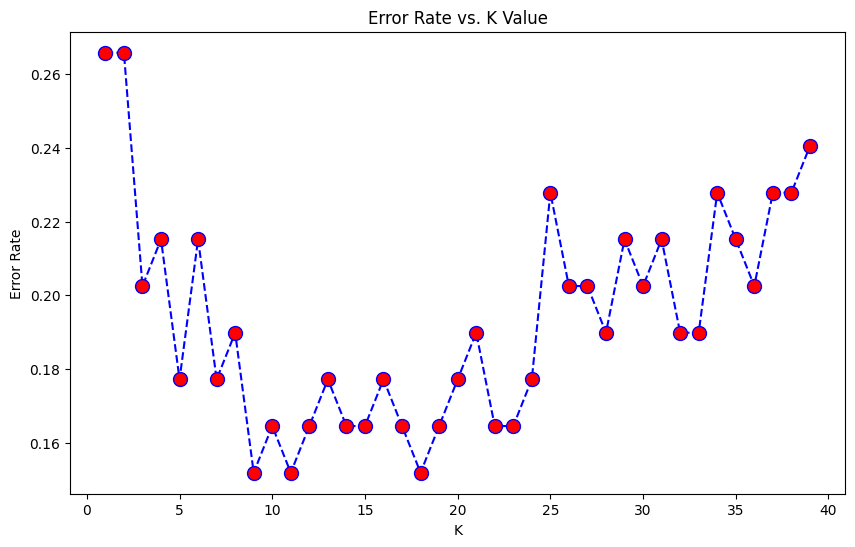

In [13]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train1,y_train1)
 pred_i = knn.predict(X_test1)
 error_rate.append(np.mean(pred_i != y_test1))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [14]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=8)

In [15]:
knn.score(X_test1, y_test1)

0.810126582278481

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train1, y_train1)

LinearDiscriminantAnalysis()

In [17]:
lda.score(X_test1, y_test1)

0.759493670886076

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)

GaussianNB()

In [19]:
gnb.score(X_test1, y_test1)

0.620253164556962

In [20]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train1, y_train1)

SVC()

In [21]:
svc.score(X_test1, y_test1)

0.810126582278481

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train1, y_train1)

RandomForestClassifier()

In [23]:
rfc.score(X_test1, y_test1)

0.8354430379746836

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train1, y_train1)

GradientBoostingClassifier()